# Aprendizado não-supervisionado: Atividade 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Nutrição

In [2]:
data = {'Calorias': [50,100], 'Proteínas': [np.nan,np.nan], 'Carboidratos': [20,15], 'Gorduras': [2,1]}  
nutri = pd.DataFrame(data)
nutri = nutri.rename(index={0: "Cereal 1", 1: "Cereal 2"})
nutri

,Calorias,Proteínas,Carboidratos,Gorduras
Cereal 1,50,NaN,20,2
Cereal 2,100,NaN,15,1


## Idades

In [8]:
def calcIdades(ernesto):
    idades = [ernesto+17,ernesto+22,ernesto+19,ernesto+7,ernesto]
    return idades
calcIdades(10)

[27, 32, 29, 17, 10]

### b) Tabela

In [9]:
idade = pd.DataFrame()
idade

""


In [10]:
for x in range(0,101):
    calcIdades(x)
    idade[x]  = calcIdades(x)
idade = idade.rename(index={0: "Alberto", 1: "Bernardo", 2: "Carol", 3: "Denise", 4: "Ernesto" })
idade

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Alberto,17,18,19,20,21,22,23,24,25,26,...,108,109,110,111,112,113,114,115,116,117
Bernardo,22,23,24,25,26,27,28,29,30,31,...,113,114,115,116,117,118,119,120,121,122
Carol,19,20,21,22,23,24,25,26,27,28,...,110,111,112,113,114,115,116,117,118,119
Denise,7,8,9,10,11,12,13,14,15,16,...,98,99,100,101,102,103,104,105,106,107
Ernesto,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100


In [11]:
idade_t = idade.transpose()
idade_t

,Alberto,Bernardo,Carol,Denise,Ernesto
0,17,22,19,7,0
1,18,23,20,8,1
2,19,24,21,9,2
3,20,25,22,10,3
4,21,26,23,11,4
...,...,...,...,...,...
96,113,118,115,103,96
97,114,119,116,104,97
98,115,120,117,105,98
99,116,121,118,106,99


### a) Gráfico

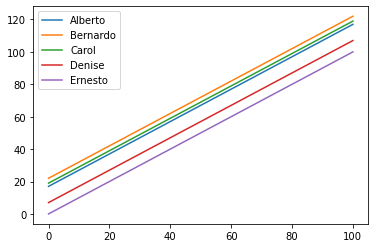

In [12]:
idade_t.plot()

## Sintomas

In [13]:
sintomas = pd.read_csv("sintomas.csv")

In [14]:
sintomas.head()

,Id do Paciente,Sintomas Respiratorios,Sintomas Corporais
0,0,falta de ar,nenhum
1,1,tosse,dor de cabeça
2,2,coriza,nenhum
3,3,falta de ar,dor muscular
4,4,tosse,nenhum


### a) Transformação One-Hot

In [17]:
sintomas2 = pd.get_dummies(sintomas, columns=['Sintomas Respiratorios','Sintomas Corporais'])
sintomas2.head()

,Id do Paciente,Sintomas Respiratorios_coriza,Sintomas Respiratorios_falta de ar,Sintomas Respiratorios_nenhum,Sintomas Respiratorios_tosse,Sintomas Corporais_cansaço,Sintomas Corporais_dor de cabeça,Sintomas Corporais_dor muscular,Sintomas Corporais_febre,Sintomas Corporais_nenhum
0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0
2,2,1,0,0,0,0,0,0,0,1
3,3,0,1,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,1


Dropando as colunas em que não há sintomas.

In [18]:
sintomas2 = sintomas2[sintomas2.columns.drop(list(sintomas2.filter(regex='nenhum')))]
sintomas2.head()

,Id do Paciente,Sintomas Respiratorios_coriza,Sintomas Respiratorios_falta de ar,Sintomas Respiratorios_tosse,Sintomas Corporais_cansaço,Sintomas Corporais_dor de cabeça,Sintomas Corporais_dor muscular,Sintomas Corporais_febre
0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,1,0,0
2,2,1,0,0,0,0,0,0
3,3,0,1,0,0,0,1,0
4,4,0,0,1,0,0,0,0


In [19]:
sintomas2.columns[1:]

Index(['Sintomas Respiratorios_coriza', 'Sintomas Respiratorios_falta de ar',
       'Sintomas Respiratorios_tosse', 'Sintomas Corporais_cansaço',
       'Sintomas Corporais_dor de cabeça', 'Sintomas Corporais_dor muscular',
       'Sintomas Corporais_febre'],
      dtype='object')

### b) Paciente(s) com mais sintomas

Os pacientes 1,  3,  5,  6, 10, 12, 15, 16, 17, 19, 21, 23, 24, 25, 27, 28, 30, 31, 34, 38, 40, 43, 44, 45, 47 e 49 apresentaram todos dois sintomas.

In [20]:
sintomas2[sintomas2.columns[1:]].sum(axis=1).sort_values(ascending=False)

49    2
31    2
28    2
27    2
25    2
23    2
21    2
19    2
17    2
16    2
15    2
12    2
10    2
6     2
5     2
3     2
1     2
30    2
24    2
47    2
34    2
45    2
44    2
38    2
43    2
40    2
32    1
13    1
2     1
46    1
4     1
7     1
9     1
11    1
42    1
41    1
14    1
29    1
39    1
18    1
20    1
37    1
22    1
48    1
35    1
33    1
0     1
8     0
36    0
26    0
dtype: int64

In [34]:
sintomas2['Id do Paciente'][sintomas2[sintomas2.columns[1:]].sum(axis=1).sort_values(ascending=False) == 2].array

<PandasArray>
[ 1,  3,  5,  6, 10, 12, 15, 16, 17, 19, 21, 23, 24, 25, 27, 28, 30, 31, 34,
 38, 40, 43, 44, 45, 47, 49]
Length: 26, dtype: int64

### c) Sintoma mais exibido

O sintoma mais comum foi "Falta de ar".

In [35]:
sintomas2.iloc[:,1:49].sum()

Sintomas Respiratorios_coriza         11
Sintomas Respiratorios_falta de ar    15
Sintomas Respiratorios_tosse          13
Sintomas Corporais_cansaço             8
Sintomas Corporais_dor de cabeça       6
Sintomas Corporais_dor muscular       10
Sintomas Corporais_febre              10
dtype: int64

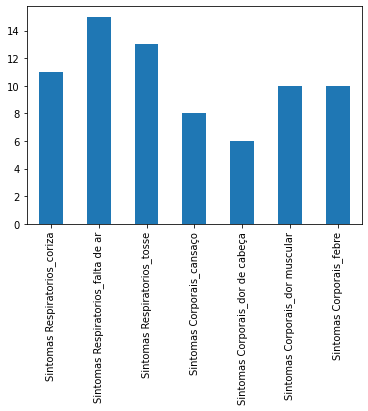

In [36]:
sintomas2.iloc[:,1:49].sum().plot.bar()

## Sorriso

In [37]:
dt = {'col1': [1,1,1,0,1], 'col2': [0,0,1,1,0],
                       'col3': [1,1,0.5,1,0],'col4': [0,0,1,1,0],
                       'col5': [1,1,1,0,1]}
sorriso = pd.DataFrame(dt)
sorriso

,col1,col2,col3,col4,col5
0,1,0,1.0,0,1
1,1,0,1.0,0,1
2,1,1,0.5,1,1
3,0,1,1.0,1,0
4,1,0,0.0,0,1


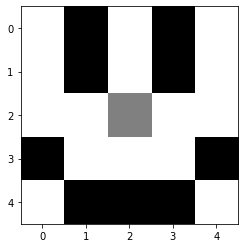

In [38]:
from skimage.io import imshow

plt.imshow(sorriso, cmap='gray')
plt.show()

## Bandeira

Fazer esse figura 10x7 fica muito ruim. Fiz 9x11.

In [39]:
dt2 = { 'col1': [1,1,0,1,1,1,1,1,1,1,1], 
       'col2': [1,1,0,1,1,0,0,0,0,0,0], 'col3': [0,0,0,0,0,1,1,1,1,1,1],
       'col4': [1,1,0,1,1,0,0,0,0,0,0], 'col5': [1,1,0,1,1,1,1,1,1,1,1],
       'col6': [0]*11, 'col7': [1]*11,
       'col8': [0]*11,'col9': [1]*11}
bandeira = pd.DataFrame(dt2)
bandeira = bandeira.transpose()
bandeira

,0,1,2,3,4,5,6,7,8,9,10
col1,1,1,0,1,1,1,1,1,1,1,1
col2,1,1,0,1,1,0,0,0,0,0,0
col3,0,0,0,0,0,1,1,1,1,1,1
col4,1,1,0,1,1,0,0,0,0,0,0
col5,1,1,0,1,1,1,1,1,1,1,1
col6,0,0,0,0,0,0,0,0,0,0,0
col7,1,1,1,1,1,1,1,1,1,1,1
col8,0,0,0,0,0,0,0,0,0,0,0
col9,1,1,1,1,1,1,1,1,1,1,1


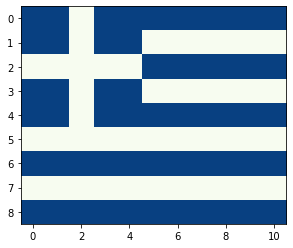

In [40]:
plt.imshow(bandeira, cmap='GnBu')
plt.show()

## Dom Casmurro

(a) Quantos documentos existe nesse arquivo?
    49 linhas de texto

(b) Quantas palavras diferentes tem nesse arquivo?
    442 palavras diferentes


(c) Qual a palavra mais frequente e quantas vezes ela aparece?
    "de" aparece 30 vezes

In [43]:
dom = pd.read_table('Frases_de_Dom_Casmurro.txt', header= None,encoding="UTF-8")
dom.columns = ['text']
dom.head()

,text
0,As curiosidades de Capitu dão para um capítulo.
1,"Eram de vária espécie, explicáveis e inexplicá..."
2,"No colégio onde, desde os sete anos, aprendera..."
3,Se não estudou latim com o Padre Cabral foi po...
4,Capitu confessou-me um dia que esta razão acen...


In [44]:
dom['length']=dom['text'].apply(len)
dom.head()

,text,length
0,As curiosidades de Capitu dão para um capítulo.,47
1,"Eram de vária espécie, explicáveis e inexplicá...",130
2,"No colégio onde, desde os sete anos, aprendera...",205
3,Se não estudou latim com o Padre Cabral foi po...,144
4,Capitu confessou-me um dia que esta razão acen...,75


### a) Quantos documentos existe nesse arquivo?

49 linhas de texto

In [45]:
dom.describe()

,length
count,49.000000
mean,85.551020
std,54.435383
min,12.000000
25%,45.000000
50%,79.000000
75%,119.000000
max,205.000000


### b) Quantas palavras diferentes tem nesse arquivo?

442 palavras diferentes

In [51]:
pd.Series(' '.join(dom['text']).split()).value_counts()

de          29
que         28
o           22
a           16
e           15
            ..
antigas,     1
Mas,         1
cabelos      1
inútil,      1
círculos     1
Length: 442, dtype: int64

### c) Qual a palavra mais frequente e quantas vezes ela aparece?

 A palavra mais comum é "de" e aparece 30 vezes.

In [52]:
from collections import Counter
count_dom = pd.DataFrame.from_dict(Counter(' '.join(dom['text']).lower().split()).most_common(50))
count_dom.columns = ['palavras', 'count']
count_dom.head()

,palavras,count
0,de,30
1,que,28
2,o,23
3,um,18
4,a,18


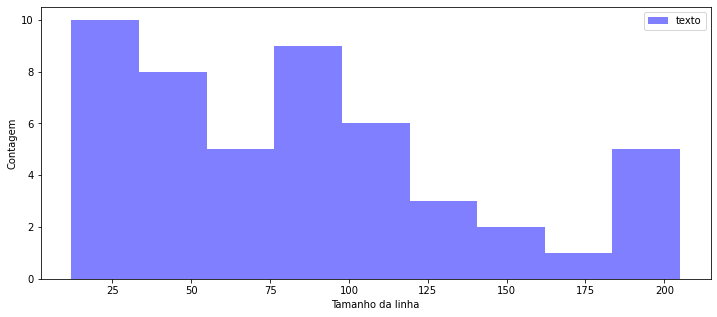

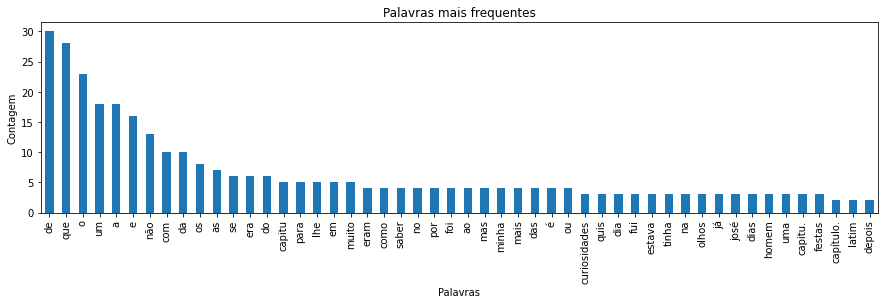

In [53]:
plt.figure(figsize=(12,5))
dom['length'].plot(bins=9,kind='hist',color='blue',label='texto',alpha=0.5)
plt.legend()
plt.xlabel('Tamanho da linha')
plt.ylabel('Contagem')
plt.show()

count_dom.plot(kind = 'bar', legend = False, figsize = (15, 3.5))
plt.xticks(np.arange(50), count_dom['palavras'])
plt.title('Palavras mais frequentes')
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.show()

### Removendo as stopwords

Tentei tirar as stopwords mas não deu certo.

In [54]:
#Lista de stopwords em português
StopW = pd.read_table("C:\\Users\\malta\\Desktop\\Pós Graduação\\Mineração de Dados\\Trabalhos\\Atividade 2\\stopwords.txt",
                   encoding = "UTF-8",header=None)

In [55]:
StopW.columns=['palavras']
StopW.head()

,palavras
0,de
1,a
2,o
3,que
4,e


In [56]:
words_ham_sw = [palavras for palavras in count_dom['palavras'] if palavras not in StopW['palavras']]

## Filmes

In [58]:
def numero_atributos(dados):
  return dados.shape[0]

In [59]:
def tabela_de_um_topico(b,c):
  A=np.zeros((numero_atributos(b),numero_atributos(c)))
  for i in range(numero_atributos(b)):
    for j in range(numero_atributos(c)):
      A[i,j]=b[i]*c[j]
  return A

In [62]:
# Matriz U da preferência em relação a comédia
datafilme = {'film1': [2,-3,5,7], 'film2': [10,-15,25,35],
                       'film3': [20,-30,50,70],'film4': [200,-300,500,700],
                       'film5': [-10,15,-25,-35]}
U = pd.DataFrame(datafilme,index=["usuario1","usuario2","usuario3","usuario4"])
print(U)

          film1  film2  film3  film4  film5
usuario1      2     10     20    200    -10
usuario2     -3    -15    -30   -300     15
usuario3      5     25     50    500    -25
usuario4      7     35     70    700    -35


In [63]:
# 
A = np.array([2,-3,5,7]) #Vetor do quanto cada usuário gosta de comédia
x = np.array([1, -5, 10, 100, -5]) #Vetor de quanto cada filme é comédia
B = tabela_de_um_topico(A,x)
B

array([[   2.,  -10.,   20.,  200.,  -10.],
       [  -3.,   15.,  -30., -300.,   15.],
       [   5.,  -25.,   50.,  500.,  -25.],
       [   7.,  -35.,   70.,  700.,  -35.]])

## (Revisão de aprendizado supervisionado)

In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
#Ajustando a reta de regressão para os pontos de interesse
X = np.array([[10], [3], [6]])
y = np.array([40,60,100])
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [79]:
#Intercepto e coeficiente
# y_i = 88.91891891891893 + (-3.51351351)*x_i
print(model.coef_)
print(model.intercept_)

[-3.51351351]
88.91891891891893


In [68]:
#Previsão da reta para (150,z)
model.predict(np.array([[150, ]]))

array([-438.10810811])